# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
import matplotlib.pyplot as plt

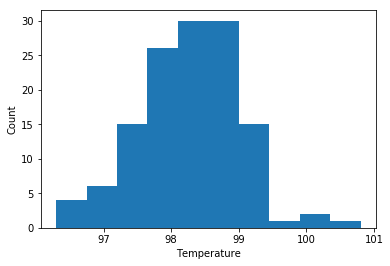

In [6]:
plt.hist(df['temperature'],bins=10)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

***The Body Temerature values forms a bell curve. Looks like the sample value of the body temerature is a Normal Distributed. Below we also confirm with the ECDF curve *** 

In [8]:
import numpy as np
mu = df['temperature'].mean()
sd1 = df['temperature'].std()
std1 = np.random.normal(mu,sd1,100)

In [7]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x, y

In [9]:
x_data, y_data = ecdf(df['temperature'])
x, y = ecdf(std1)

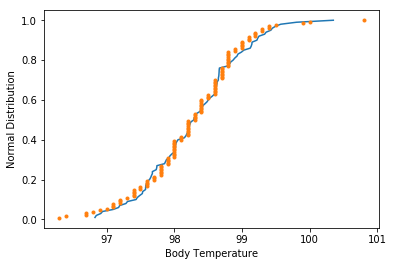

In [10]:
plt.plot(x,y)
plt.plot(x_data,y_data,marker='.',linestyle='none')
plt.xlabel('Body Temperature')
plt.ylabel('Normal Distribution')
plt.show()

*** The curve for the sample is almost aligned with the curve of the mean of the sample. Proving that it is normally distributed ***

*** Also from the curve it proves that the sample size is large enough. The observation is independent because getting 100 sample values are generated randomly from the current mean & standard deviation and they overlap with the actual observation. ***

### Is the true population mean really 98.6 degrees F? 

In [13]:
df.shape

(130, 3)

In [17]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [18]:
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


In [19]:
bs_replicate_temp = draw_bs_reps(df['temperature'],np.mean,10000)
bs_replicate_temp

array([ 98.17692308,  98.34230769,  98.38153846, ...,  98.18461538,
        98.28461538,  98.26076923])

In [20]:
conf_int = np.percentile(bs_replicate_temp,[2.5,97.5])
conf_int

array([ 98.12153846,  98.37384615])

In [21]:
bs_replicate_temp = draw_bs_reps(df['temperature'],np.mean,10)
conf_int = np.percentile(bs_replicate_temp,[2.5,97.5])
conf_int

array([ 98.12892308,  98.37086538])

*** 95% confidence interval indicates that mean of the body temperature falls between 98.12 and 98.37. It is way different from the population mean. ***

** Would you use a one-sample or two-sample test? Why? ** 

We will use one-sample test because we are not comparing temperature on any subject matter. One-Sample test works here because temperature is independent

** In this situation, is it appropriate to use the t or z statistic? ** 

We can use Z statistic because the given sample is more than 30

** Now try using the other test. How is the result be different? Why? **

Will come back on this later

** Draw a small sample of size 10 from the data and repeat both tests. **

• Which one is the correct one to use? 

• What do you notice? What does this tell you about the difference in application of the t 
 and z 
 statistic? 

Will come back on the above questions


** At what temperature should we consider someone's temperature to be "abnormal"? **

• Start by computing the margin of error and confidence interval.

The above 95% confidence interval of the mean shows that the mean falls between 98.1 to 98.4. So any temperature above 98.4 is considered abnormal.

** Is there a significant difference between males and females in normal temperature? ** 

• What test did you use and why? 

• Write a story with your conclusion in the context of the original problem.

In [22]:
df_M = df[df.gender=='M']
np.mean(df_M['temperature'])
np.std(df_M['temperature'])
df_F = df[df.gender=='F']
np.mean(df_F['temperature'])

98.39384615384613

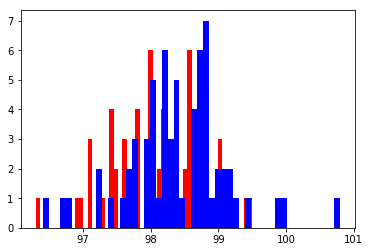

In [23]:
plt.hist(df_M['temperature'],bins = 50,color='red')
plt.hist(df_F['temperature'],bins = 50,color='Blue')
plt.show()

In [24]:
np.std(df_F['temperature'])

0.7377464486428966

In [25]:
def permuted_sample(data1,data2):
    data = np.concatenate((data1,data2))
    perm_data = np.random.permutation(data)
    perm_data1 = perm_data[:len(data1)]
    perm_data2 = perm_data[len(data1):]
    return perm_data1,perm_data2

In [26]:
perm_sample_M, perm_sample_F = permuted_sample(df_M['temperature'],df_F['temperature'])
x_M_s, y_M_s = ecdf(perm_sample_M)
x_F_s, y_F_s = ecdf(perm_sample_F)

In [27]:
x_M, y_M = ecdf(df_M['temperature'])
x_F, y_F = ecdf(df_F['temperature'])

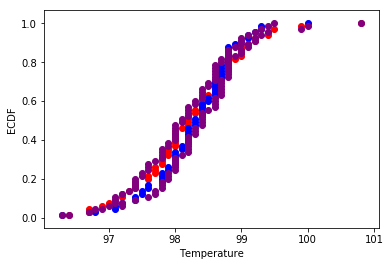

In [28]:
plt.scatter(x_M_s, y_M_s, color='red')
plt.scatter(x_F_s, y_F_s, color='blue')
plt.scatter(x_M, y_M, color='purple')
plt.scatter(x_F, y_F, color='purple')
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.show()

In [29]:
def diff_of_mean(data1,data2):
    return np.mean(data2) - np.mean(data1)

In [30]:
def perm_rep_func(data1,data2,func):
    perm_rep = np.empty(1000)
    for i in range(1000):
        perm_sample_M, perm_sample_F = permuted_sample(data1,data2)
        perm_rep[i] = func(perm_sample_M, perm_sample_F)
    return  perm_rep 

In [36]:
perm_diff_mean = perm_rep_func(df_M['temperature'],df_F['temperature'],diff_of_mean)
actual_diff_mean = diff_of_mean(df_M['temperature'],df_F['temperature'])

In [37]:
p = np.sum(perm_diff_mean >= actual_diff_mean)/len(perm_diff_mean)
p

0.01

** This concluded that is not a significant difference in normal temperature beloween male & female. **

** I used Permutation test **

With the confidence test we concluded how confidence we were on the men of mal & female body temperature.
Then we found the difference in the mean and also did null hypothesis test that concluded that there is a significant difference in normal body temperatue of male & female.